In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글 글꼴 설정
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
# 데이터 로드
sales_data = pd.read_csv('./csv/sales.csv')
brand_keyword_data = pd.read_csv('./csv/brand_keyword_cnt.csv')
product_info = pd.read_csv('./csv/product_info.csv')
train_data = pd.read_csv('./csv/train.csv')

sales_data.head(), brand_keyword_data.head(), product_info.head(), train_data.head()

(   ID                제품             대분류             중분류             소분류  \
 0   0  B002-00001-00001  B002-C001-0002  B002-C002-0007  B002-C003-0038   
 1   1  B002-00002-00001  B002-C001-0003  B002-C002-0008  B002-C003-0044   
 2   2  B002-00002-00002  B002-C001-0003  B002-C002-0008  B002-C003-0044   
 3   3  B002-00002-00003  B002-C001-0003  B002-C002-0008  B002-C003-0044   
 4   4  B002-00003-00001  B002-C001-0001  B002-C002-0001  B002-C003-0003   
 
           브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  ...  \
 0  B002-00001           0           0           0           0  ...   
 1  B002-00002           0           0           0           0  ...   
 2  B002-00002           0           0           0           0  ...   
 3  B002-00002           0           0           0           0  ...   
 4  B002-00003           0           0           0           0  ...   
 
    2023-03-26  2023-03-27  2023-03-28  2023-03-29  2023-03-30  2023-03-31  \
 0           0           0          

In [4]:
sales_filtered = pd.read_csv('./csv/sales_filtered.csv')
train_filtered = pd.read_csv('./csv/train_filtered.csv')

In [5]:
# 판매량 데이터를 브랜드별로 합산하여 분석
brand_sales_data = train_filtered.drop(columns=['ID', '제품', '대분류', '중분류', '소분류']).groupby('브랜드').sum()

brand_sales_diff = brand_sales_data.diff(axis=1)

# 100 이상 증가한 경우 찾기
threshold = 100
significant_brand_increases = brand_sales_diff > threshold

brands_with_increases = significant_brand_increases.apply(lambda x: x[x].index.tolist(), axis=1)
dates_with_increases = significant_brand_increases.apply(lambda x: x[x].index.tolist(), axis=1)

brand_increase_summary = pd.DataFrame({
    'Brand': brands_with_increases.index,
    'Significant Increase Dates': dates_with_increases.values
})

# 100 이상 증가한 브랜드만 필터링
filtered_brand_increase_summary = brand_increase_summary[brand_increase_summary['Significant Increase Dates'].apply(lambda x: len(x) > 0)]

filtered_brand_increase_summary

,Brand,Significant Increase Dates
10,B002-00017,"[2022-01-22, 2022-04-22, 2022-04-30, 2022-05-0..."
11,B002-00020,"[2023-01-27, 2023-01-28]"
13,B002-00024,"[2022-12-26, 2022-12-28]"
24,B002-00053,"[2022-04-02, 2022-05-27]"
34,B002-00067,"[2022-01-05, 2022-01-06, 2022-05-25, 2022-05-2..."
...,...,...
2460,B002-03774,"[2022-04-26, 2022-08-28, 2022-08-29, 2022-09-15]"
2461,B002-03776,[2022-11-17]
2468,B002-03786,"[2022-02-17, 2022-04-09, 2022-10-03, 2022-11-2..."
2471,B002-03791,[2022-02-08]


In [6]:
keyword_data = pd.read_csv('./csv/brand_keyword_cnt.csv')
sales_data = pd.read_csv('./csv/products_with_significant_train_increases.csv')

keyword_data, sales_data

(             브랜드  2022-01-01  2022-01-02  2022-01-03  2022-01-04  2022-01-05  \
 0     B002-00001     0.84131     0.91383    1.450530    2.422390    1.871190   
 1     B002-00002    12.64868    20.27850   15.332170   12.750210   13.562510   
 2     B002-00003     0.33362     0.43516    0.362630    0.174060    0.217580   
 3     B002-00005     1.07339     1.71163    2.016240    1.914700    1.987230   
 4     B002-00006     0.00000     0.00000    0.188558    0.246574    0.246574   
 ...          ...         ...         ...         ...         ...         ...   
 3165  B002-03794     2.32085     2.98810    3.611830    4.061500    3.669850   
 3166  B002-03795     0.14505     0.00000    0.087030    0.072520    0.087030   
 3167  B002-03796     0.00000     0.00000    0.000000    0.000000    0.000000   
 3168  B002-03798     0.14505     0.00000    0.116040    0.072520    0.116040   
 3169  B002-03799     4.55468     5.54105    6.150270    6.396860    7.006090   
 
       2022-01-06  2022-01

In [7]:
import ast
from datetime import datetime

def convert_to_datetime(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

keyword_data.set_index('브랜드', inplace=True)

# 판매 증가 데이터에서 날짜 리스트를 문자열로 변환 후 datetime 형식으로 변환
sales_data['Significant Increase Dates'] = sales_data['Significant Increase Dates'].apply(ast.literal_eval)
sales_data['Significant Increase Dates'] = sales_data['Significant Increase Dates'].apply(lambda dates: [convert_to_datetime(date) for date in dates])

In [8]:
# 각 브랜드별로 날짜 리스트를 사용하여 이전과 이후의 키워드 언급량을 계산하는 함수
def calculate_keyword_mentions(brand, dates):
    if brand not in keyword_data.index:
        return None, None

    keyword_mentions = keyword_data.loc[brand]
    total_before = 0
    total_after = 0

    for date in dates:
        date_str = date.strftime('%Y-%m-%d')
        if date_str in keyword_mentions.index:
            before = keyword_mentions[:date_str].sum()
            after = keyword_mentions[date_str:].sum()
            total_before += before
            total_after += after

    return total_before, total_after

In [9]:
# 각 브랜드별로 키워드 언급량을 계산
brand_keyword_analysis = []

for index, row in sales_data.iterrows():
    brand = row['Brand']
    dates = row['Significant Increase Dates']
    total_before, total_after = calculate_keyword_mentions(brand, dates)
    if total_before is not None and total_after is not None:
        brand_keyword_analysis.append([brand, total_before, total_after])

brand_keyword_analysis_df = pd.DataFrame(brand_keyword_analysis, columns=['Brand', 'Total_Before', 'Total_After'])

# 키워드 언급량 변화 계산
brand_keyword_analysis_df['Change'] = brand_keyword_analysis_df['Total_After'] - brand_keyword_analysis_df['Total_Before']

In [10]:
# 상관관계 계산
correlation = brand_keyword_analysis_df[['Total_Before', 'Total_After', 'Change']].corr()

print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
              Total_Before  Total_After    Change
Total_Before      1.000000     0.916014 -0.767390
Total_After       0.916014     1.000000 -0.445733
Change           -0.767390    -0.445733  1.000000


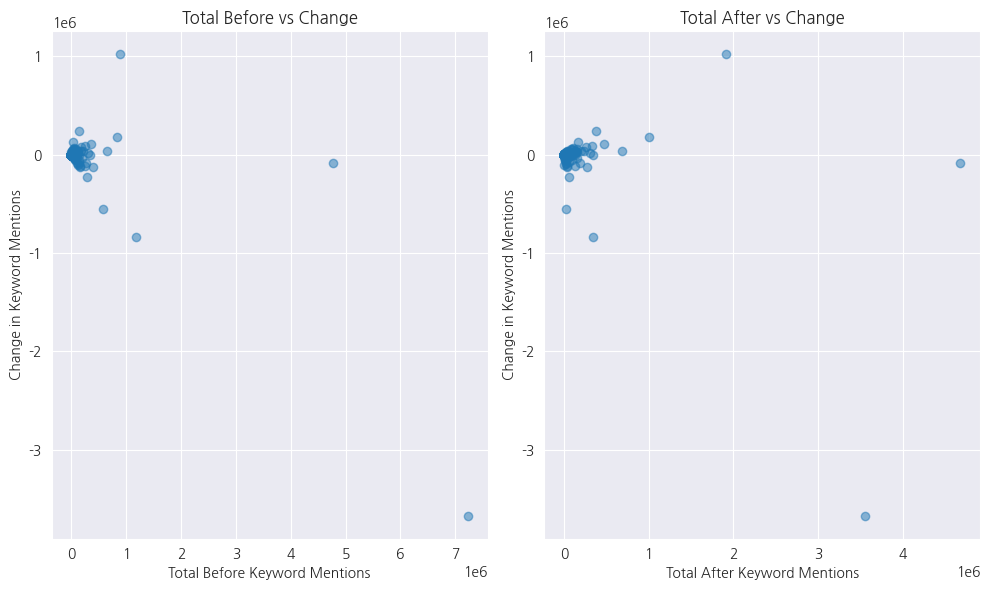

In [11]:
# 키워드 언급량 변화와 판매 증가 간의 관계를 시각화
plt.figure(figsize=(10, 6))

# Total_Before vs Change
plt.subplot(1, 2, 1)
plt.scatter(brand_keyword_analysis_df['Total_Before'], brand_keyword_analysis_df['Change'], alpha=0.5)
plt.title('Total Before vs Change')
plt.xlabel('Total Before Keyword Mentions')
plt.ylabel('Change in Keyword Mentions')

# Total_After vs Change
plt.subplot(1, 2, 2)
plt.scatter(brand_keyword_analysis_df['Total_After'], brand_keyword_analysis_df['Change'], alpha=0.5)
plt.title('Total After vs Change')
plt.xlabel('Total After Keyword Mentions')
plt.ylabel('Change in Keyword Mentions')

plt.tight_layout()
plt.show()

In [12]:
# 각 경우에 해당하는 브랜드 정리

# 1. 초기 키워드 언급량(Total_Before)이 많고 이후 변화량이 적은 브랜드
high_before_low_change = brand_keyword_analysis_df[
    (brand_keyword_analysis_df['Total_Before'] > brand_keyword_analysis_df['Total_Before'].mean()) & 
    (brand_keyword_analysis_df['Change'] < brand_keyword_analysis_df['Change'].mean())
]

# 2. 판매량 증가 후 키워드 언급량(Total_After)이 많고 이후 변화량이 적은 브랜드
high_after_low_change = brand_keyword_analysis_df[
    (brand_keyword_analysis_df['Total_After'] > brand_keyword_analysis_df['Total_After'].mean()) & 
    (brand_keyword_analysis_df['Change'] < brand_keyword_analysis_df['Change'].mean())
]

# 3. 초기 키워드 언급량(Total_Before)이 많고 이후 키워드 언급량(Total_After)도 많은 브랜드
high_before_high_after = brand_keyword_analysis_df[
    (brand_keyword_analysis_df['Total_Before'] > brand_keyword_analysis_df['Total_Before'].mean()) & 
    (brand_keyword_analysis_df['Total_After'] > brand_keyword_analysis_df['Total_After'].mean())
]

# 결과 확인
high_before_low_change, high_after_low_change, high_before_high_after

(          Brand  Total_Before   Total_After        Change
 17   B002-00149  4.878783e+04  2.712413e+04 -2.166370e+04
 22   B002-00202  5.360768e+04  2.130938e+04 -3.229831e+04
 23   B002-00227  8.558322e+04  6.942559e+04 -1.615763e+04
 52   B002-00416  6.514081e+04  5.263694e+04 -1.250388e+04
 76   B002-00579  1.177889e+06  3.376609e+05 -8.402282e+05
 79   B002-00628  1.121241e+05  6.209955e+03 -1.059142e+05
 85   B002-00656  2.884463e+05  6.074004e+04 -2.277062e+05
 89   B002-00669  6.567324e+04  5.779735e+04 -7.875884e+03
 90   B002-00676  3.950167e+05  2.703565e+05 -1.246602e+05
 96   B002-00731  1.561406e+05  3.445727e+04 -1.216833e+05
 127  B002-00900  1.849062e+05  1.483261e+05 -3.658004e+04
 133  B002-00985  6.435506e+04  4.355702e+04 -2.079803e+04
 143  B002-01028  7.628534e+04  1.713948e+04 -5.914586e+04
 160  B002-01138  5.016653e+04  3.490133e+04 -1.526520e+04
 163  B002-01144  1.456284e+05  9.303879e+04 -5.258963e+04
 172  B002-01210  1.084099e+05  1.910333e+04 -8.930659e+